In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
#Read excel file from the current working directory
#Uploaded the cleaneded data done already in excel - that is changing spend data to correct format
CD = pd.read_excel('CC#2.xlsx')

In [3]:
#View DataFrame
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98094 entries, 0 to 98093
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Campaign                 98022 non-null  object        
 1   Ad Format                98023 non-null  object        
 2   Clicks                   86217 non-null  float64       
 3   Spend                    98094 non-null  float64       
 4   Creative - Size          69695 non-null  object        
 5   Date                     98094 non-null  datetime64[ns]
 6   Impressions              98094 non-null  int64         
 7   Reach                    77500 non-null  float64       
 8   Audience                 98053 non-null  object        
 9   Platform                 98094 non-null  object        
 10  Creative - Family        97211 non-null  object        
 11  Creative - Version       97569 non-null  object        
 12  100% Video Views         24258 n

In [4]:
print(CD)

           Campaign     Ad Format  Clicks  Spend Creative - Size       Date  \
0              FY22  Single image     0.0   0.26             NaN 2022-05-19   
1              FY22  Single image     0.0   0.15             NaN 2022-05-19   
2              FY22  Single image     0.0   0.38             NaN 2022-05-19   
3              FY22  Single image     0.0   0.19             NaN 2022-05-19   
4              FY22  Single image     1.0   3.62             NaN 2022-05-19   
...             ...           ...     ...    ...             ...        ...   
98089          ESPN            TV     NaN   0.10             NaN 2022-05-01   
98090           MTV            TV     NaN   0.17             NaN 2022-05-01   
98091  Food Network            TV     NaN   0.14             NaN 2022-05-01   
98092    Nat Geo TV            TV     NaN   0.58             NaN 2022-05-01   
98093         Pluto            TV     NaN   7.14             NaN 2022-05-01   

       Impressions  Reach            Audience   Pla

In [5]:
#View the first five rows
CD.head(5)

,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,Platform,Creative - Family,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score
0,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
1,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
2,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
3,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
4,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN


Things to note:
- Above command shows there are missing values in some columns. Therefore we can remove these individualds from the dataset. However, in some columns there is no data for anything. For example, the creative size column has no data at all. So must be careful when clearing the data.
- Instead observing the column, choose to delete columns where there are missing data in the Campaign, Ad Format, Clicks, Date, Impressions, Reach, Audience, Platform, Creative-Family, Creative - Version, 100% Video, Video Starts, Follows, CTR, CTR Score, Weighted CTR
- In the Audience column if we look at the options there should be only 6 different audiences. However there is a category of domain targetting which doesn't fit. We can remove these individuals from the dataset.

In [6]:
#Creating new dataframe with no missing values 
CD_new = CD.dropna(subset = ['Campaign', 'Clicks','Creative - Size', 'Reach', '100% Video Views'])

In [7]:
#View new dataframe
print(CD_new)

                                   Campaign Ad Format  Clicks       Spend  \
503        1 - StackAdapt - Display - Video     Video     0.0    5.385759   
505        1 - StackAdapt - Display - Video     Video     0.0    5.385772   
630        3 - StackAdapt - Display - Video     Video     0.0    0.091778   
681        3 - StackAdapt - Display - Video     Video     0.0    4.875151   
697        2 - StackAdapt - Display - Video     Video     0.0    2.384257   
...                                     ...       ...     ...         ...   
94406      4 - StackAdapt - Display - Video     Video     1.0   52.840132   
94407      4 - StackAdapt - Display - Video     Video     0.0   52.781207   
94469  5 - StackAdapt - Remarketing - Video     Video     4.0  184.986774   
94470  5 - StackAdapt - Remarketing - Video     Video     1.0  195.399332   
94471  5 - StackAdapt - Remarketing - Video     Video     4.0  193.098164   

      Creative - Size       Date  Impressions  Reach Audience        Platfo

In [8]:
#Remove the unnecessary columns
CD_new2 = CD_new.drop(['100% Video Views', 'Follows', 'Video Starts','Days away from max date',
                       'Latest report?'],axis=1)

In [9]:
#View new dataframe
print(CD_new2)

                                   Campaign Ad Format  Clicks       Spend  \
503        1 - StackAdapt - Display - Video     Video     0.0    5.385759   
505        1 - StackAdapt - Display - Video     Video     0.0    5.385772   
630        3 - StackAdapt - Display - Video     Video     0.0    0.091778   
681        3 - StackAdapt - Display - Video     Video     0.0    4.875151   
697        2 - StackAdapt - Display - Video     Video     0.0    2.384257   
...                                     ...       ...     ...         ...   
94406      4 - StackAdapt - Display - Video     Video     1.0   52.840132   
94407      4 - StackAdapt - Display - Video     Video     0.0   52.781207   
94469  5 - StackAdapt - Remarketing - Video     Video     4.0  184.986774   
94470  5 - StackAdapt - Remarketing - Video     Video     1.0  195.399332   
94471  5 - StackAdapt - Remarketing - Video     Video     4.0  193.098164   

      Creative - Size       Date  Impressions  Reach Audience        Platfo

In [40]:
#Creating new dataframe with no missing values 
CD_new3 = CD.dropna(subset = ['Campaign', 'Clicks','Impressions', 'Reach', 'CTR'])

In [41]:
#View new dataframe
print(CD_new3)

                                    Campaign     Ad Format  Clicks  \
0                                       FY22  Single image     0.0   
1                                       FY22  Single image     0.0   
2                                       FY22  Single image     0.0   
3                                       FY22  Single image     0.0   
4                                       FY22  Single image     1.0   
...                                      ...           ...     ...   
94467  5 - StackAdapt - Remarketing - Native        Native     1.0   
94468  5 - StackAdapt - Remarketing - Native        Native     0.0   
94469   5 - StackAdapt - Remarketing - Video         Video     4.0   
94470   5 - StackAdapt - Remarketing - Video         Video     1.0   
94471   5 - StackAdapt - Remarketing - Video         Video     4.0   

            Spend Creative - Size       Date  Impressions  Reach Audience  \
0        0.260000             NaN 2022-05-19          119   63.0        1   
1    

In [43]:
#Remove the unnecessary columns
CD_new4 = CD_new3.drop(['100% Video Views', 'Follows', 'Video Starts','Days away from max date',
                       'Latest report?'],axis=1)

In [44]:
#View new dataframe
print(CD_new4)

                                    Campaign     Ad Format  Clicks  \
0                                       FY22  Single image     0.0   
1                                       FY22  Single image     0.0   
2                                       FY22  Single image     0.0   
3                                       FY22  Single image     0.0   
4                                       FY22  Single image     1.0   
...                                      ...           ...     ...   
94467  5 - StackAdapt - Remarketing - Native        Native     1.0   
94468  5 - StackAdapt - Remarketing - Native        Native     0.0   
94469   5 - StackAdapt - Remarketing - Video         Video     4.0   
94470   5 - StackAdapt - Remarketing - Video         Video     1.0   
94471   5 - StackAdapt - Remarketing - Video         Video     4.0   

            Spend Creative - Size       Date  Impressions  Reach Audience  \
0        0.260000             NaN 2022-05-19          119   63.0        1   
1    

<AxesSubplot:xlabel='Spend', ylabel='Reach'>

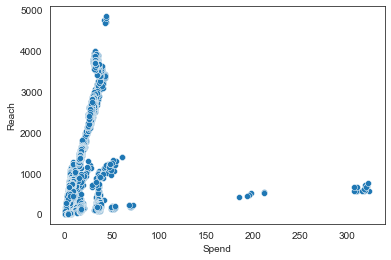

In [42]:
sns.scatterplot(y='Reach', x='Spend', data=CD_new2)

<AxesSubplot:xlabel='Spend', ylabel='Reach'>

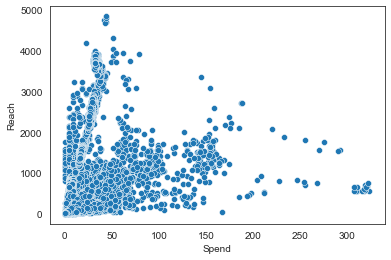

In [45]:
sns.scatterplot(y='Reach', x='Spend', data=CD_new4)

In [46]:
Creative_details1 = CD_new2.groupby(['Audience','Platform'])['Spend'].sum().reset_index() 

Creative_details1

,Audience,Platform,Spend
0,1,Domain Display,2441.681227
1,1,User ID Display,11850.237967
2,2,Domain Display,796.065684
3,2,User ID Display,2378.701793
4,3,Domain Display,2358.547584
5,3,User ID Display,11618.371968
6,4,Domain Display,8730.963044
7,4,User ID Display,24516.934554
8,5,Domain Display,23063.708468
9,5,User ID Display,4585.134268


In [47]:
Creative_details2 = CD_new4.groupby(['Audience','Platform'])['Spend'].sum().reset_index() 

Creative_details2

,Audience,Platform,Spend
0,1,Domain Display,10675.689314
1,1,Facebook,1997.174256
2,1,Instagram,330.875744
3,1,LinkedIn,14290.180388
4,1,User ID Display,11850.237967
5,2,Domain Display,2822.377092
6,2,Facebook,1565.250000
7,2,Instagram,301.270000
8,2,LinkedIn,8722.673002
9,2,User ID Display,2378.701793


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '1 - StackAdapt - Display - Video'),
  Text(1, 0, '3 - StackAdapt - Display - Video'),
  Text(2, 0, '2 - StackAdapt - Display - Video'),
  Text(3, 0, '4 - StackAdapt - Display - Video'),
  Text(4, 0, '5 - StackAdapt - Remarketing - Video'),
  Text(5, 0, 'FY22 Change Wholesale'),
  Text(6, 0, 'FY22 Change Wholesale - 3 - Display - Banner'),
  Text(7, 0, 'FY22 Change Wholesale - 1 - Display - Banner'),
  Text(8, 0, 'FY22 Change Wholesale - 5 - Display - ClickRetargeting for UnRegistered'),
  Text(9, 0, 'FY22 Change Wholesale - 2 - Display - Banner'),
  Text(10, 0, 'FY22 Change Wholesale - 4 - Display - Banner'),
  Text(11, 0, 'FY22 Change Wholesale - 5 - Display - ClickRetargeting for Registered'),
  Text(12, 0, 'FY22 Change Wholesale - 4 - Display - Banner - Domain'),
  Text(13, 0, 'FY22 Change Wholesale - 4 - Display - Banner - IP Data')])

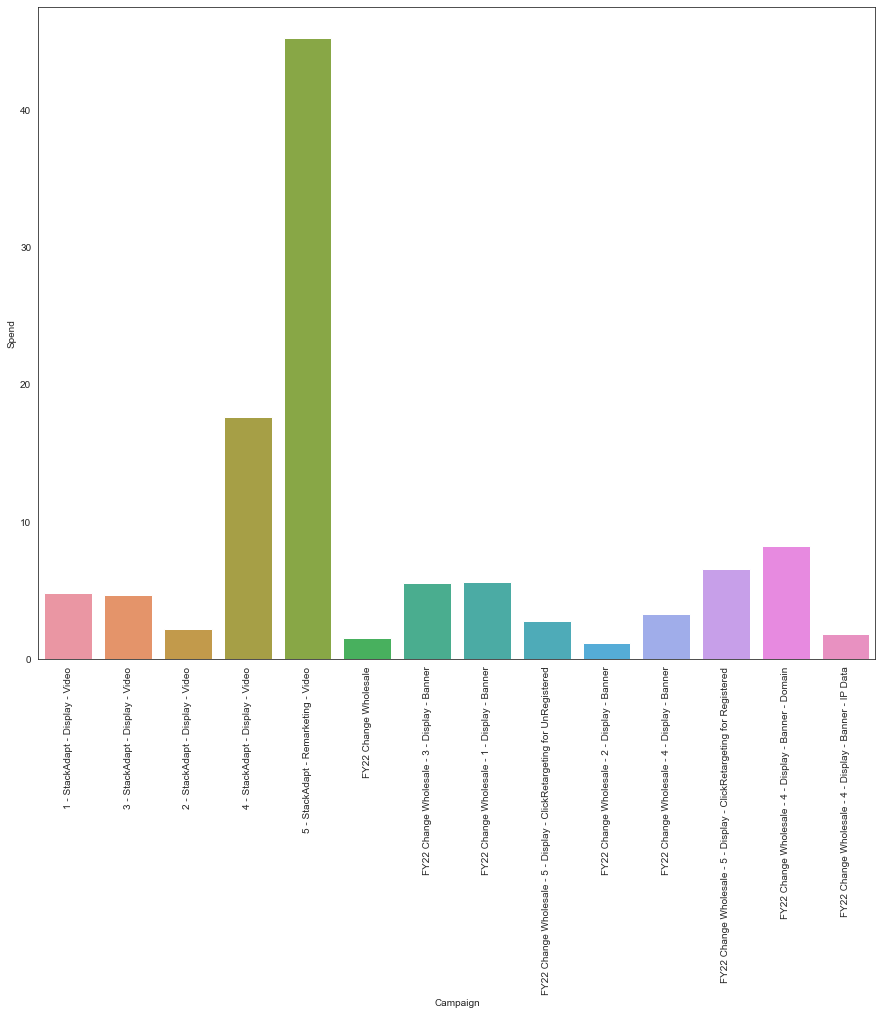

In [12]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Spend', data=CD_new2, ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '1 - StackAdapt - Display - Video'),
  Text(1, 0, '3 - StackAdapt - Display - Video'),
  Text(2, 0, '2 - StackAdapt - Display - Video'),
  Text(3, 0, '4 - StackAdapt - Display - Video'),
  Text(4, 0, '5 - StackAdapt - Remarketing - Video'),
  Text(5, 0, 'FY22 Change Wholesale'),
  Text(6, 0, 'FY22 Change Wholesale - 3 - Display - Banner'),
  Text(7, 0, 'FY22 Change Wholesale - 1 - Display - Banner'),
  Text(8, 0, 'FY22 Change Wholesale - 5 - Display - ClickRetargeting for UnRegistered'),
  Text(9, 0, 'FY22 Change Wholesale - 2 - Display - Banner'),
  Text(10, 0, 'FY22 Change Wholesale - 4 - Display - Banner'),
  Text(11, 0, 'FY22 Change Wholesale - 5 - Display - ClickRetargeting for Registered'),
  Text(12, 0, 'FY22 Change Wholesale - 4 - Display - Banner - Domain'),
  Text(13, 0, 'FY22 Change Wholesale - 4 - Display - Banner - IP Data')])

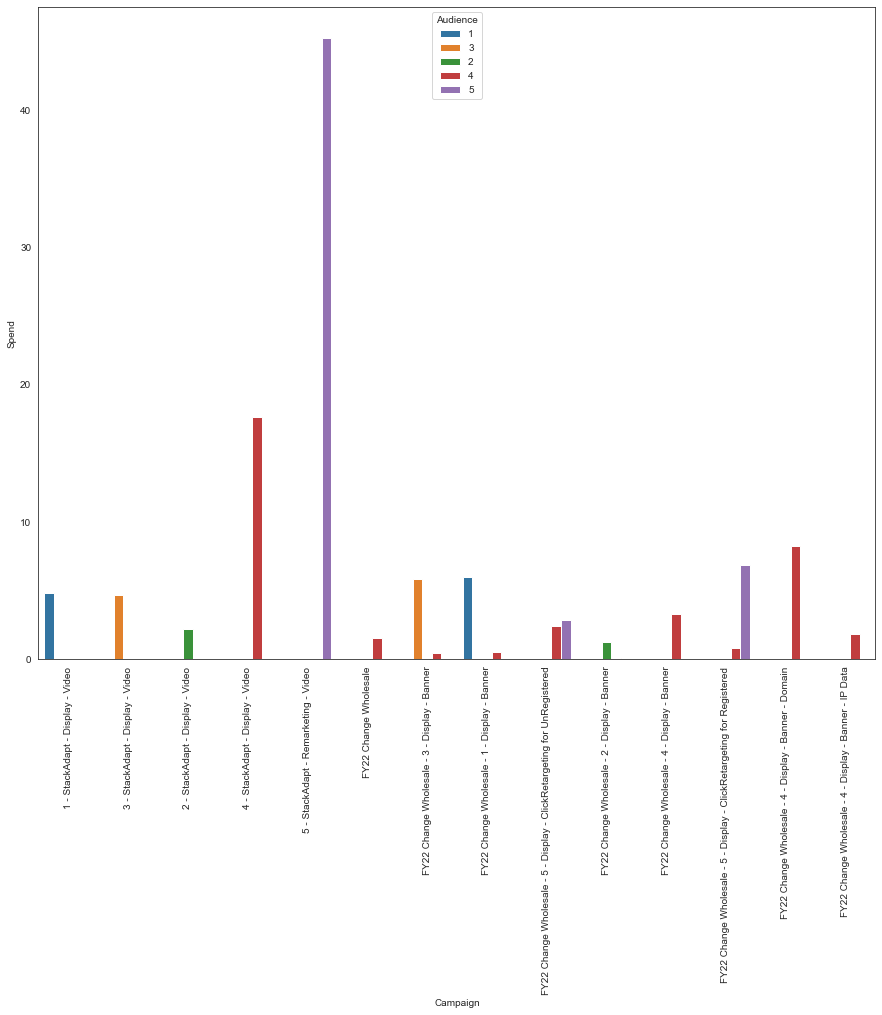

In [13]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Spend', hue='Audience', data=CD_new2, ci=None)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '3'),
  Text(2, 0, '2'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

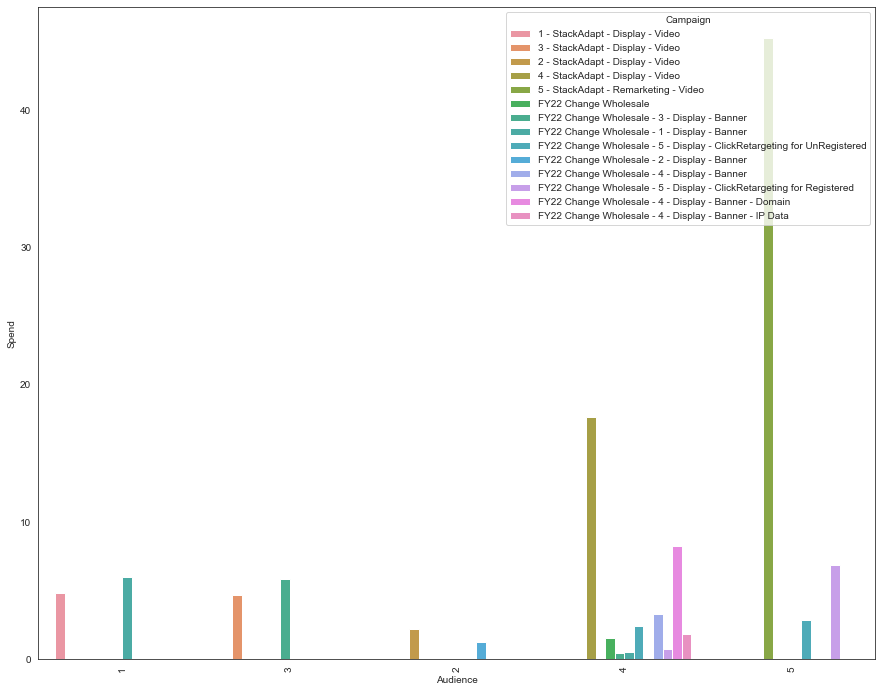

In [14]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Spend', hue='Campaign', data=CD_new2, ci=None)
plt.xticks(rotation=90)

## Regression Analysis 

Spend VS Clicks

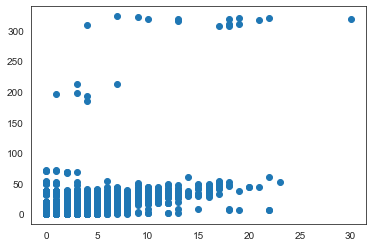

In [15]:
#Independent variable
y = CD_new2["Spend"] 

#Dependent variable
X = CD_new2["Clicks"]

#Check for linearity
plt.scatter(X,y)

In [16]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = CD_new2).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     5995.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:18:45   Log-Likelihood:                -59785.
No. Observations:               15262   AIC:                         1.196e+05
Df Residuals:                   15260   BIC:                         1.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7454      0.113     15.437      0.000       1.524       1.967
X              3.2900      0.042     77.429      0.000       3.207       3.373
==============================================================================
Omnibus:                    26370.429   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         37177061.654
Skew:                          12.003   Prob(JB):                         0.00
Kurtosis:                     243.595   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1.745384
X            3.290050
dtype: float64
Standard errors:  Intercept    0.113065
X            0.042491
dtype: float64
Predicted values:  [ 1.745384    1.745384    1.745384   ... 14.90558348  5.03543387
 14.90558348]


Second data

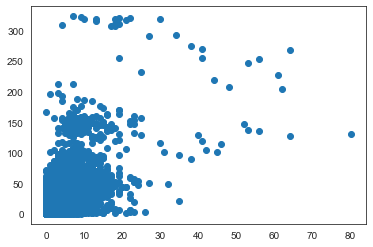

In [49]:
#Independent variable
y = CD_new4["Spend"] 

#Dependent variable
X = CD_new4["Clicks"]

#Check for linearity
plt.scatter(X,y)

In [50]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = CD_new4).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 4.590e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:33:47   Log-Likelihood:            -2.4482e+05
No. Observations:               65623   AIC:                         4.896e+05
Df Residuals:                   65621   BIC:                         4.897e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8650      0.042     44.846      0.000       1.783       1.946
X              4.1665      0.019    214.232      0.000       4.128       4.205
==============================================================================
Omnibus:                    88798.182   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53944621.317
Skew:                           7.435   Prob(JB):                         0.00
Kurtosis:                     142.670   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1.864972
X            4.166514
dtype: float64
Standard errors:  Intercept    0.041586
X            0.019449
dtype: float64
Predicted values:  [ 1.86497162  1.86497162  1.86497162 ... 18.53102587  6.03148518
 18.53102587]


Spend VS Impressions

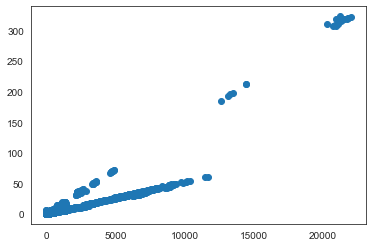

In [18]:
#Independent variable
y = CD_new2["Spend"] 

#Dependent variable
X = CD_new2["Impressions"]

#Check for linearity
plt.scatter(X,y)

In [19]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = CD_new2).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 3.936e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:18:48   Log-Likelihood:                -52582.
No. Observations:               15262   AIC:                         1.052e+05
Df Residuals:                   15260   BIC:                         1.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2702      0.069     -3.905      0.000      -0.406      -0.135
X              0.0072   3.61e-05    198.401      0.000       0.007       0.007
==============================================================================
Omnibus:                    25420.178   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32663128.682
Skew:                          11.100   Prob(JB):                         0.00
Kurtosis:                     228.546   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -0.270195
X            0.007154
dtype: float64
Standard errors:  Intercept    0.069184
X            0.000036
dtype: float64
Predicted values:  [ 2.34811525  2.34811525  0.60257516 ... 89.89696607 94.98335542
 93.86735438]


Second data

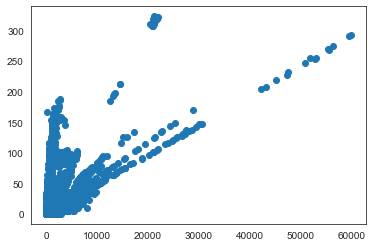

In [53]:
#Independent variable
y = CD_new4["Spend"] 

#Dependent variable
X = CD_new4["Impressions"]

#Check for linearity
plt.scatter(X,y)

In [54]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = CD_new4).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 7.253e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:35:26   Log-Likelihood:            -2.3779e+05
No. Observations:               65623   AIC:                         4.756e+05
Df Residuals:                   65621   BIC:                         4.756e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4577      0.037     38.966      0.000       1.384       1.531
X              0.0061   2.28e-05    269.308      0.000       0.006       0.006
==============================================================================
Omnibus:                   102136.643   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58987874.411
Skew:                          10.000   Prob(JB):                         0.00
Kurtosis:                     148.511   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1.457690
X            0.006144
dtype: float64
Standard errors:  Intercept    0.037409
X            0.000023
dtype: float64
Predicted values:  [ 2.18887782  1.51299027  1.61744562 ... 78.90211424 83.27080556
 82.31227413]


Spend VS Reach 

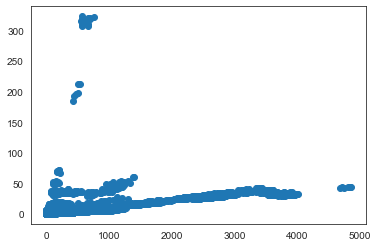

In [21]:
#Independent variable
y = CD_new2["Spend"] 

#Dependent variable
X = CD_new2["Reach"]

#Check for linearity
plt.scatter(X,y)

In [22]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = CD_new2).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4606.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:18:54   Log-Likelihood:                -60301.
No. Observations:               15262   AIC:                         1.206e+05
Df Residuals:                   15260   BIC:                         1.206e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3070      0.116     19.920      0.000       2.080       2.534
X              0.0094      0.000     67.867      0.000       0.009       0.010
==============================================================================
Omnibus:                    30569.824   Durbin-Watson:                   0.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88710897.039
Skew:                          16.459   Prob(JB):                         0.00
Kurtosis:                     375.045   Cond. No.                         952.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept    2.306984
X            0.009393
dtype: float64
Standard errors:  Intercept    0.115812
X            0.000138
dtype: float64
Predicted values:  [2.60754514 2.60754514 2.35394687 ... 6.28941629 6.74025766 6.45848181]


Second data

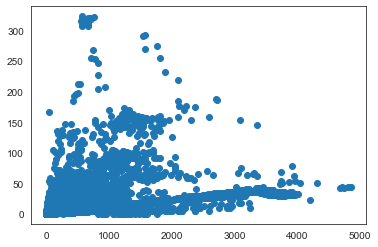

In [56]:
#Independent variable
y = CD_new4["Spend"] 

#Dependent variable
X = CD_new4["Reach"]

#Check for linearity
plt.scatter(X,y)

In [57]:
#Run the OLS model
f = 'y ~ X'
test = ols(f, data = CD_new4).fit()

#View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                 1.939e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:19   Log-Likelihood:            -2.5373e+05
No. Observations:               65623   AIC:                         5.075e+05
Df Residuals:                   65621   BIC:                         5.075e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6340      0.048     55.405      0.000       2.541       2.727
X              0.0148      0.000    139.232      0.000       0.015       0.015
==============================================================================
Omnibus:                   104519.276   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         94152654.551
Skew:                          10.278   Prob(JB):                         0.00
Kurtosis:                     187.422   Cond. No.                         470.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Extract the estimated parameters
print("Parameters: ", test.params)  

#Extract the standard errors
print("Standard errors: ", test.bse)  

#Extract the predicted values
print("Predicted values: ", test.predict())  

Parameters:  Intercept    2.633995
X            0.014838
dtype: float64
Standard errors:  Intercept    0.047541
X            0.000107
dtype: float64
Predicted values:  [3.56880334 2.75270116 2.88624515 ... 8.92540129 9.63763592 9.19248928]


### Multiple Linear regression

In [24]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [27]:
CD_new2.corr()

,Clicks,Spend,Impressions,Reach,CTR,CTR Score,Weighted CTR Score
Clicks,1.000000,0.531092,0.774009,0.740176,0.068023,0.235686,0.858945
Spend,0.531092,1.000000,0.848899,0.481511,-0.077877,-0.174747,0.725999
Impressions,0.774009,0.848899,1.000000,0.847711,-0.087700,-0.169233,0.896426
Reach,0.740176,0.481511,0.847711,1.000000,-0.081174,-0.115770,0.772266
CTR,0.068023,-0.077877,-0.087700,-0.081174,1.000000,0.344485,-0.071780
CTR Score,0.235686,-0.174747,-0.169233,-0.115770,0.344485,1.000000,0.056658
Weighted CTR Score,0.858945,0.725999,0.896426,0.772266,-0.071780,0.056658,1.000000


Second data

In [51]:
CD_new4.corr()

,Clicks,Spend,Impressions,Reach,CTR,CTR Score,Weighted CTR Score
Clicks,1.000000,0.641527,0.755484,0.566884,0.120237,0.327606,0.860636
Spend,0.641527,1.000000,0.724565,0.477544,-0.000854,0.060824,0.677730
Impressions,0.755484,0.724565,1.000000,0.605210,-0.031322,-0.021154,0.915495
Reach,0.566884,0.477544,0.605210,1.000000,-0.014530,0.049099,0.565913
CTR,0.120237,-0.000854,-0.031322,-0.014530,1.000000,0.380648,-0.011249
CTR Score,0.327606,0.060824,-0.021154,0.049099,0.380648,1.000000,0.155580
Weighted CTR Score,0.860636,0.677730,0.915495,0.565913,-0.011249,0.155580,1.000000


#### Regression 1

In [28]:
#Define the dependent variable
y = CD_new2['Spend'] 

#Define the independent variable
X = CD_new2[['Impressions', 'Reach']] 

In [29]:
#Specify the model
multi = LinearRegression()  

#Fit the model
multi.fit(X, y)

LinearRegression()

In [30]:
#Call the predictions for X (array)
multi.predict(X)

array([  5.27001798,   5.27001798,   2.49513261, ..., 160.3289806 ,
       168.92116874, 167.35731536])

In [31]:
#Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.9221195496237286
Intercept:  0.9673855237651905
Coefficients:


[('Impressions', 0.013199008961375238), ('Reach', -0.016506400638537474)]

Second data

In [59]:
#Define the dependent variable
y = CD_new4['Spend'] 

#Define the independent variable
X = CD_new4[['Impressions', 'Reach']] 

In [60]:
#Specify the model
multi = LinearRegression()  

#Fit the model
multi.fit(X, y)

LinearRegression()

In [61]:
#Call the predictions for X (array)
multi.predict(X)

array([ 2.17078511,  1.42441465,  1.54071965, ..., 75.62844646,
       79.86425308, 78.89762133])

In [62]:
#Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.527398699908566
Intercept:  1.356650044731055
Coefficients:


[('Impressions', 0.005828339456116696), ('Reach', 0.0019136931746335168)]

#### Regression 2

In [32]:
# Define the dependent variable.
y = CD_new2['Spend'] 

# Define the independent variable.
X = CD_new2[['Impressions', 'Reach','Clicks']] 

In [33]:
#Specify the model
multi = LinearRegression()  

#Fit the model
multi.fit(X, y)

LinearRegression()

In [34]:
#Call the predictions for X (array)
multi.predict(X)

array([  5.80986421,   5.80986421,   2.85572325, ..., 165.42494763,
       177.22572749, 172.82410209])

In [35]:
#Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.9301242858122746
Intercept:  1.2455756128868005
Coefficients:


[('Impressions', 0.013839576437943138),
 ('Reach', -0.015656136737518853),
 ('Clicks', -0.9041118584264051)]

Second data

In [64]:
# Define the dependent variable.
y = CD_new4['Spend'] 

# Define the independent variable.
X = CD_new4[['Impressions', 'Reach','Clicks']]

In [65]:
#Specify the model
multi = LinearRegression()  

#Fit the model
multi.fit(X, y)

LinearRegression()

In [66]:
#Call the predictions for X (array)
multi.predict(X)

array([ 1.79610541,  1.24199707,  1.3280163 , ..., 65.69952983,
       64.89516664, 68.29580179])

In [67]:
#Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.5460074212170412
Intercept:  1.1939707698121365
Coefficients:


[('Impressions', 0.004653039333836568),
 ('Reach', 0.0007686183416682514),
 ('Clicks', 1.3831892801304617)]

#### Regression 3

In [68]:
# Define the dependent variable.
y = CD_new2['Spend'] 

# Define the independent variable.
X = CD_new2[['Impressions', 'Clicks']] 

In [69]:
#Specify the model
multi = LinearRegression()  

#Fit the model
multi.fit(X, y)

LinearRegression()

In [70]:
#Call the predictions for X (array)
multi.predict(X)

array([  3.83432963,   3.83432963,   1.58873591, ..., 108.67817678,
       121.06086134, 113.78598216])

In [71]:
#Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.76020620602338
Intercept:  0.46593905205571406
Coefficients:


[('Impressions', 0.009203252937511772), ('Clicks', -1.9463905734227769)]

Second data

In [72]:
# Define the dependent variable.
y = CD_new4['Spend'] 

# Define the independent variable.
X = CD_new4[['Impressions', 'Clicks']]

In [73]:
#Specify the model
multi = LinearRegression()  

#Fit the model
multi.fit(X, y)

LinearRegression()

In [74]:
#Call the predictions for X (array)
multi.predict(X)

array([ 1.79193326,  1.27058727,  1.35115892, ..., 66.66163084,
       65.75872573, 69.29205833])

In [75]:
#Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.545636784945398
Intercept:  1.227931690994521
Coefficients:


[('Impressions', 0.0047395089777925795), ('Clicks', 1.424231999385458)]

## Clustering

<AxesSubplot:xlabel='Impressions', ylabel='Spend'>

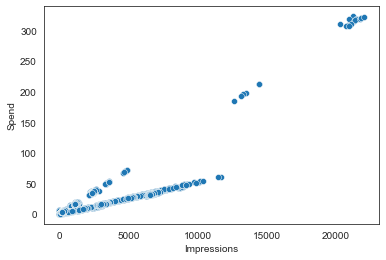

In [36]:
#Create a scatterplot with Seaborn
sns.scatterplot(x='Impressions',
                y='Spend',
                data=CD_new2)

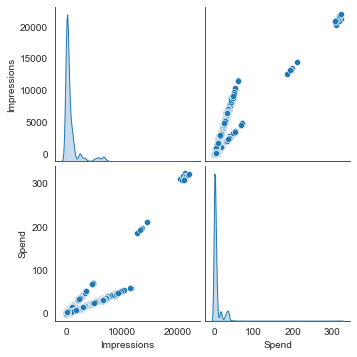

In [37]:
#Create a pairplot with Seaborn
x = CD_new2[['Impressions', 'Spend']]

sns.pairplot(CD_new2,
             vars=x,
             diag_kind= 'kde')

### Elbow method

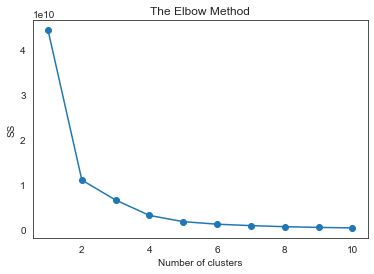

In [38]:
#Import the KMeans class
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

### Silhouette method

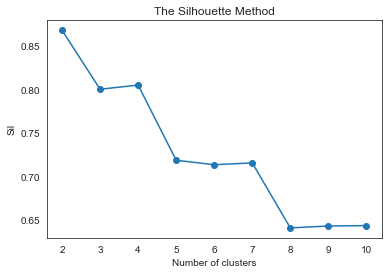

In [39]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()